---
<a id="top"></a>
# Functions

## Overview
* [Basic Function Definition](#basicFunctionDefintion)
  * [Function and Parameter Naming](#naming)
  * [Arbitrary Number of Arguments](#arbitraryNumberOfArguments)
  * [Calling Parameters by Name](#callingParametersByName)
  * [Argument Default Values](#argumentDefaultValues)
  * [Keyword Arguments](#keywordArguments)
* [Scope](#scope)
* [Coffee Example](#coffee_example04)
---
In the previous chapters you have used different built-in functions such as `len(list)` or methods like `sort( )` to be invoked on objects of the class `list`. Thus, the built-in functions differ on  the way they are invoked, and  how data is passed to the function/method:

| Built-In Function | kind of function | Dot-Notation | Passing Data as Argument | Returning a value
|----|:----:|:----:|:----:|:----:|
|**`len(`**_`list`_**`)`** | generic function |❌ | ✔ | the length of the list |
|**_`list`_.`sort( )`** | method | ✔ | ❌ | ❌ |

Actually, since `sort( )` is a method, it has access to all the internal data of that object (e.g. the list items), while `len( )` as a generic function can only access data, which is handed over as an argument, as you know it from mathematical functions. `len( )` works on different objects of different types like `str`, `list`, `dict` etc. (actually all `iterable` types), while a method works specifically on the object it is invoked for via `dot notation`.

In this lecture you will learn how to program and use your own functions (with and without passing data to the function).

---
<a name="basicFunctionDefintion"></a>
## [Basic Function Definition](#top)

A corner stone for writing more complex programs is the ability to define your own functions. They encapsulate code for reuse. So each time you invoke a function, the same code is executed.

In order to call a function, you must know its *name* and how many *arguments* it expects. Third, you have to distinguish between functions that return a result, which might be assigned to a variable, and so called _procedures_, which execute code, but do not return any result: 

| Component | Defintion | Example
|-----|-----|-----|
| name | the name to be invoked. | `len`, `print` |
| input parameters (optional) | Passing data into the function. | `len(list_1)`, `print('hello')` |
| return statement (optional) | Returning data as a result. | `lenght = len( list_1 )`, `print(list_1)` |


In `Python` a function definition starts with the keyword `def` followed by the function name and brackets `( )` followed by `:` and then an indented block, which contains the function code. All input parameters (if any) are defined within these brackets.

Our first function increments its argument by one and returns this value as a result:

In [ ]:
def increment_function( number ): # function name: increment, input parameter: number
    return number + 1 # return newly computed value depending on argument

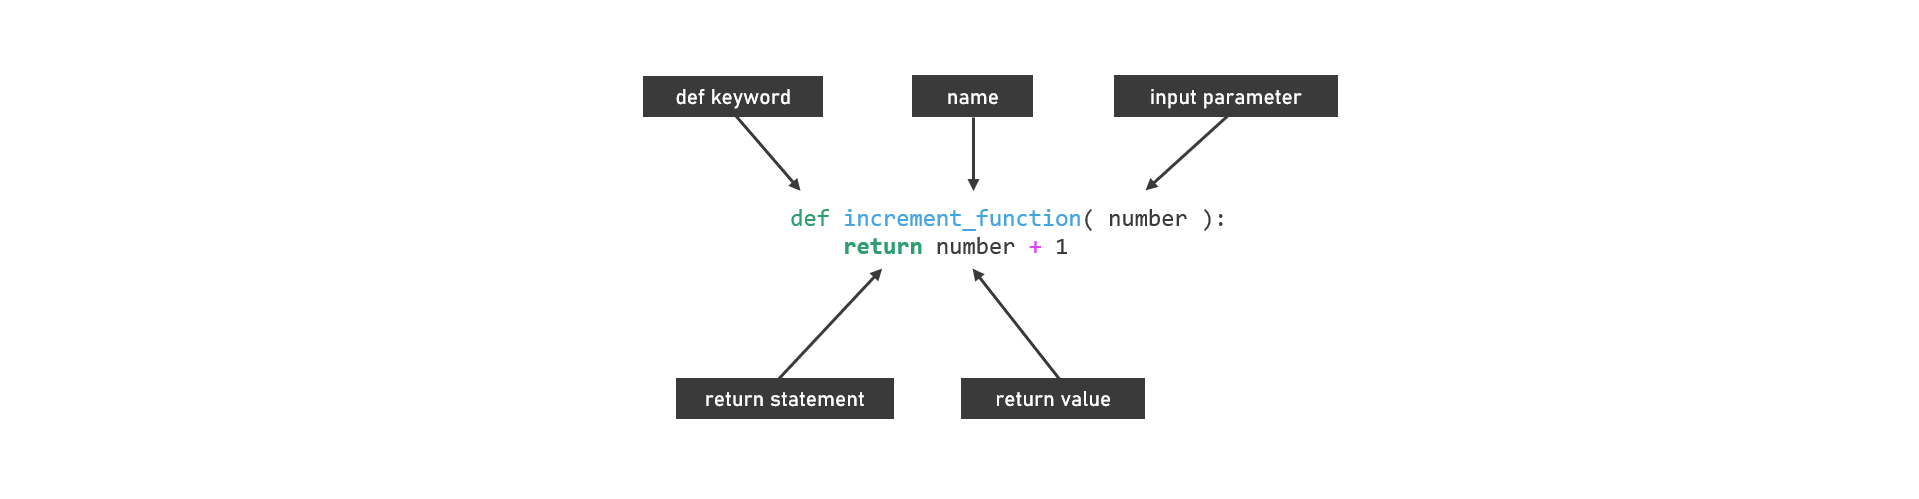

Now the newly defined function can be called just as built-in functions:

In [ ]:
y = increment_function(2)
y

When executing the function, the computed value is returned and replaces the function call in the calling expression. Thus, the result is assigned to the value y in the above example.

The `return` ends the execution of a function. Every code after the return statement will not be executed. Therefore, calling the following function will not produce a print output.

In [ ]:
def increment_and_print_function(number):
    return number + 1
    print('new computed value:', number+1)

In [ ]:
increment_and_print_function(42)

We can also have functions without input parameter and/or without return value (thus we call it a procedure):

In [ ]:
def print_full_address():
    print("Max Mustermann")
    print("Musterstrasse 5")
    print("52062 Aachen")

In [ ]:
print_full_address()

If no return value is specified, a special object called `None` is returned.

In [ ]:
x = print_full_address()
print("-"*15)
print(x)

<a name="naming"></a>
### [Function and Parameter Naming](#top)
For function names and the names of their parameters, the same fundamental rules apply as for variables:
1. The name should indicate the function's semantic
2. The name should be written in lowercase with words separated by underscores
3. Abbreviations should be clear and used with caution

Functions can also have more arguments than just one.

In [ ]:
def add(numOne, numTwo): 
    return numOne + numTwo

add(13, 42)

In [ ]:
add(13,42,5)

> **Note:** Functions with an exact number of input parameters need the exact number of arguments when called, otherwise it leads to a `TypeError`.

To avoid this error, there are also some functions, such as `print()`, which can even have a __variable number__ of arguments. These can be specified, by packing a various number of positional arguments as a tuple.

---
<a name="arbitraryNumberOfArguments"></a>
## [Arbitrary Number of Arguments](#top)

If a function should be callable with various number of arguments (such as the built-in `print()` function), this can be defined in `Python` with the help of the __* parameter__.

This allows a passing of arbitrary number of objects as an __iterable__:

In [ ]:
def my_sum(*args):
    result = 0
    print(type(args), 'args:', args)
    for element in args:
        result += element
    return result

In [ ]:
my_sum (1, 2, 3, 4, 5, 6, 7, 8, 20)

We already know this behavior from the built-in `print` function:

In [ ]:
print("One argument string.")
print ("Many", "arguments", "can", "be", "printed,", "even", 42, "numbers.")

On the other hand, using the `*` operator on an iterable returns its items:

In [ ]:
def sum_all_items(iter):
    result = 0
    print('argument is an iterable:', iter)
    print('type of argument: ', type(iter))
    for element in iter:
        result += element
    return result

In [ ]:
items = (3,7,-22,3.5)
result_sum = sum_all_items(items)
print(result_sum)

>__Note:__ sum_all_items must be called with __one__ argument, which must be an **iterable** (e.g. a `list`). It can not be called with a varying number of arguments:

**Error Message** `TypeError: sum_all_items() takes 1 positional argument but 6 were given`

In [ ]:
sum_all_items( 1, 3, 5, 7, 9, 11 ) # This will return an error

In [ ]:
sum_all_items( ( 1, 3, 5, 7, 9, 11 ) ) 

In [ ]:
sum_all_items( [] ) # empty lists are ok

So you have __two options__ to define functions, which are to operate on an arbitrary number of arguments: 
* either define __one__ parameter as an iterable, which can contain a variable number of values
* or define a function with a variable number of arguments with the `*` operator

---
<a name="callingParametersByName"></a>
## [Calling Parameters by Name ](#top) 

In [ ]:
def my_division( numerator, denominator ):
    return numerator / denominator

my_division(10, 5)

In some contexts, it might make sense to change the order of the arguments, when calling the function, or to make it obvious, what the call means. So when calling the function, you can expicitly assign values to the parameters (by using their name):

In [ ]:
my_division(denominator=10, numerator=5) 

---
<a name="argumentDefaultValues"></a>
## [Argument Default Values](#top)
Default values make specifying parameters in a call optional. If the value is not specified, then the default is used. <br>

E.g. our division might be a division by two, if the denominator is not specified as an argument, when calling the function.

In [ ]:
def division_default(numerator = 1, denominator = 2): # divide by two, if denomiantor is not given
    return numerator / denominator

In [ ]:
print(division_default(10, 5)) # normal call
print(division_default(10)) # leave out second positional argument => denominator takes default value
print(division_default()) # both default
print(division_default(denominator=4)) # nominator default

---
<a name="keywordArguments"></a>
## [Keyword Arguments](#top)

Keyword arguments can only be called by name. Mostly they are omitted (default values). 

`Python` has a number of functions that take an unlimited number of positional arguments. These functions sometimes have optional arguments that can be provided to customize their functionality. Those arguments must be provided as named arguments to distinguish them from the unlimited positional arguments.

The built-in `print` function accepts the optional `sep`, `end`, `file`, and `flush` attributes as _keyword-only_ arguments, because it has generally an arbitrary number of _positional_ arguments:

In [ ]:
print('comma', 'separated', 'words', sep=', ', end='.') 

__Keyword arguments__ allow for passing any additional parameters (typically after a variable number of positional arguments) and their names as a `dictionary`. This is usually named as `**kwargs`:

In [ ]:
# function with a variable number of positional arguments, as well as key word parameters
def func(*args, **kwargs): 
    print('args =', args) 
    print('kwargs =', kwargs)

In [ ]:
func(1,2,3)

In [ ]:
func(1,2,3,4,additional=5,further=6)

In [ ]:
# function with a variable number of positional arguments, as well as key word parameters
def sum_up(*args, **kwargs): 
    print('args =', args) 
    print('kwargs =', kwargs)
    
    # compute sum over all positional arguments
    result = 0
    for i in args:
        result += i
    print('result only utilizing positional arguments:', result)
    
    return result

In [ ]:
sum_up()

In [ ]:
sum_up(1,2,3)

In [ ]:
sum_up(1,2,3,4,additional=5,further=6)

In [ ]:
# sum over variable number of positional arguments, and optional computation via key word parameters
def sum_up(*args, **kwargs): 
    print('args =', args) 
    print('kwargs =', kwargs)
    
    # compute sum over all positional arguments
    result = 0
    for i in args:
        result += i
    print('intermediate result only with positional arguments:', result)
    
    # now use the additional keyword arguments to compute the final result
    for key in kwargs:
        if key == 'subtract':
            result -= kwargs[key]
            print('subtract ', kwargs[key], '=>', result)
        if key == 'multiply':
            result *= kwargs[key]
            print('multiply by', kwargs[key], '=>', result)
        if key == 'divide':
            result /= kwargs[key]
            print('divide by', kwargs[key], '=>', result)
            
    return result

In [ ]:
sum_up(1, 2, 3, subtract=20, divide=2) 

> **Reminder:** [Integer Division vs. (Float) Division](01_intro.ipynb#arithmeticOperators)

If you specify a keyword argument, which is not defined within the function, it is "ignored":

In [ ]:
sum_up(42, add=2)

In [ ]:
sum_up(29,13,multiply=0.5,subtract=-21)

---
<a name="scope"></a>
## [Scope](#top)

<a id="namespace"></a>
Variables _locally defined within a function_ are only valid within that function. Thus, functions define their own __namespace__.

In [ ]:
glob = 42 # some "global variable"

def f(x):
    local = 2 * x + 1 # this is a local variable and the argument x
    print('Within f( ) the argument x = ', x, ', local variable local =', local, ', glob =', glob )
    return local

x = f(glob) # this is a new "global" variable x
print("( global ) x has value", x, "after calling f( glob ). Local x is not visible here.")

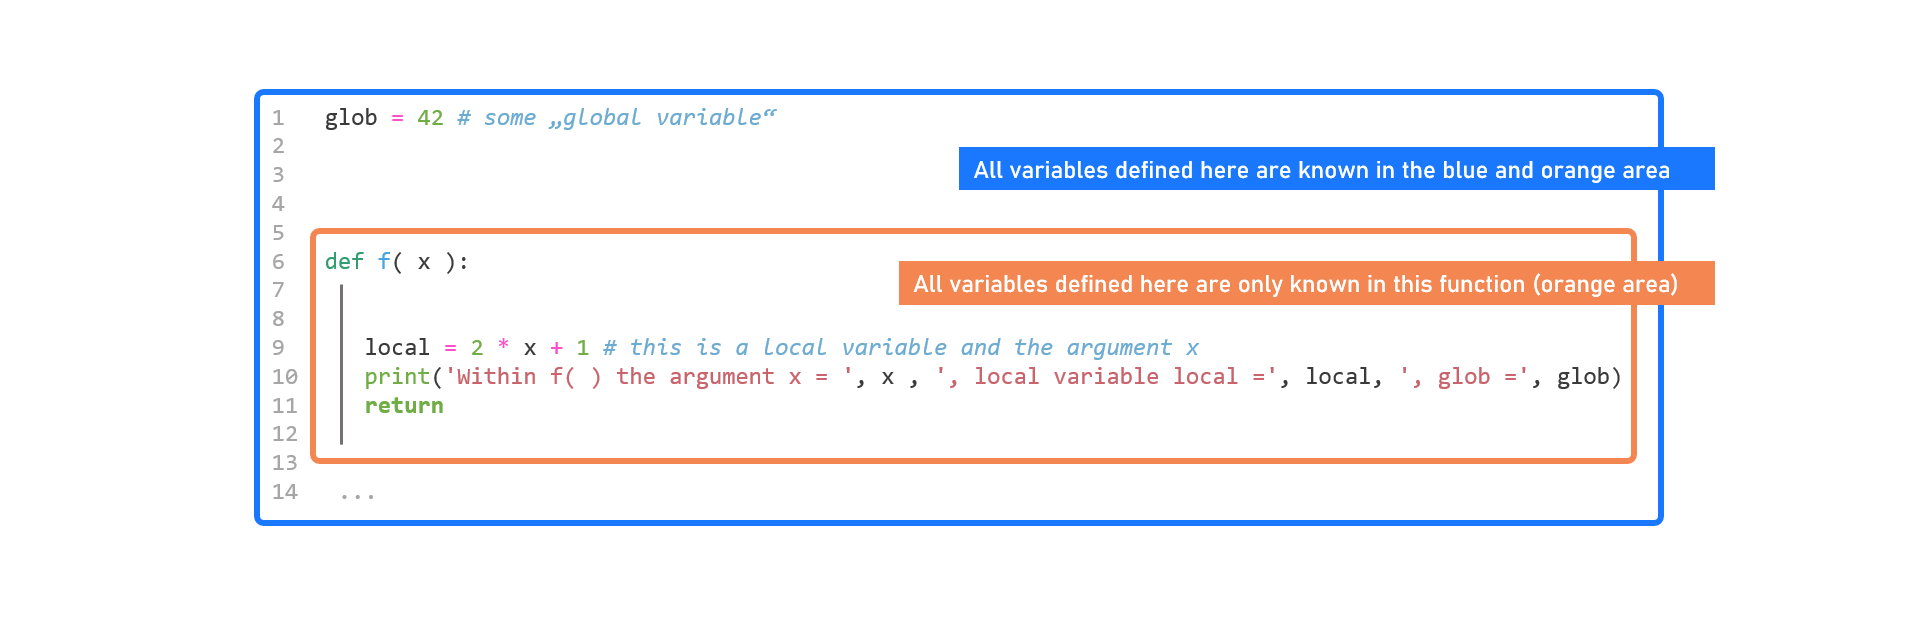

Below, a reduced example is given that will produce an error, as a local variable is accessed outside its namespace: <br>
**Error Message** `NameError: name 'local' is not defined`

In [ ]:
glob = 42

def f(x):
    local = 42 + x
    return local

print('f(5) =', f(5))
print('local =', local)

> **Note:** Calling the local variable `local` will force a `NameError`, as the variable is not callable from outside the function `f(x)`.

Variables that get assigned new values only have the new value inside the function:

In [ ]:
glob = 42 # some "global variable"

def f(x):
    local = 2 * x + 1 # this is a local variable y and the argument x
    glob = 0 # this is a local var overshadowing the global one

    print('Within f( ) the argument x = ', x, ', local variable local =', local, 'glob =', glob )
    return local

x = f(glob) # x becomes a new "global" variable which is distinct from the parameter x inside the funtion
print("x has value", x, "after calling f( glob )")
print("glob has not changed: glob =", glob )

So we have two distinct scopes, which define namespaces: 
1. global namespace (module  => in our case the current JuNB)
2. a namespace within the function

Outside the function, only variables initialized outside the function (thus in the scope of the current module) are visible.

Inside the function, all three, the __*global*__ variables, the __*parameters*__ and the __*local*__ variables assigned within the function are visible and valid.

From a software engineering standpoint, it seems dangerous to rely on global variables within functions. There is one reason, where it makes sense:
* when you program a whole module with various functions, which share common values (mostly constants), then those might be declared globally
* a module is specified by the file name, in which variables and functions are commonly defined

> **Note:** In `Python`, constants are written in uppercase letter. In the following example, $\pi$ is initialized as a constant, written as `PI`.

In [ ]:
# file circle.py
PI = 3.14159 # constant in our module, to be used in all functions

def circum( r ):
    return 2 * PI * r

def circarea( r ):
    return PI * r * r

In [ ]:
# in another file:
# from circum import *

print('the circumference of this circle is', circum(42))
print('the circle area is', circarea(42))

What exactly these modules are and how to import other files in Python skripts' will be introduced in the [next module](05_ExternalModules.ipynb).

---
<a name="coffee_example04"></a>
## [Coffee Example](#top)
Before we summarize this module, let's look again at our coffee price calculator. Previously we improved the user input check and put the code in a loop such that we can calculate prices constantly without executing the code again:

In [ ]:
PRICE_COFFEE = 1.20
PRICE_MILK = 0.30
PRICE_SUGAR = 0.10

while True:
    print('Configure your coffee:')
    want_milk = input('Do you want milk: ')
    want_sugar = input('Do you want sugar: ')

    # Check if the input in lower cases was 'yes'
    want_milk = want_milk.lower() == 'yes'
    want_sugar = want_sugar.lower() == 'yes'

    to_pay = PRICE_COFFEE + int(want_milk) * PRICE_MILK + int(want_sugar) * PRICE_SUGAR
    print(f'Your coffee costs € {to_pay:4.2f}')
    # Add a visual separator of the single input and output groups
    print('===========================')
    if input('Another coffee?: ').lower() != 'yes':
        break

Now, we want to wrap this code in a function:

In [ ]:
# Define the prices as global constants
PRICE_COFFEE = 1.20
PRICE_MILK = 0.30
PRICE_SUGAR = 0.10

def calculate_coffee_price(want_milk, want_sugar):
    return PRICE_COFFEE + int(want_milk) * PRICE_MILK + int(want_sugar) * PRICE_SUGAR

while True:
    print('Configure your coffee:')
    want_milk = input('Do you want milk: ')
    want_sugar = input('Do you want sugar: ')
    
    # Check if the input in lower cases was 'yes'
    want_milk = want_milk.lower() == 'yes'
    want_sugar = want_sugar.lower() == 'yes'

    # use our newly defined function to calculate the proce
    print(f'Your coffee costs € {calculate_coffee_price(want_milk, want_sugar):4.2f}')
    
    # Add a visual separator of the single input and output groups
    print('===========================')
    
    # stop endless loop
    if input('Another coffee?: ').lower() != 'yes':
        break

We encapsulated the price calculation in its own function which takes two parameters to determine if milk and sugar are added to the coffee.

Next, we want to encapsulate the reading of the user input and return two `bool`s, stating if the customer wants milk or sugar:

In [ ]:
# Define the prices as global constants
PRICE_COFFEE = 1.20
PRICE_MILK = 0.30
PRICE_SUGAR = 0.10

def read_user_input():
    want_milk = input('Do you want milk: ')
    want_sugar = input('Do you want sugar: ')

    # Check if the input in lower cases was 'yes'
    want_milk = int(want_milk.lower() == 'yes')
    want_sugar = int(want_sugar.lower() == 'yes')
    
    return (want_milk, want_sugar)

def calculate_coffee_price(want_milk, want_sugar):
    return PRICE_COFFEE + want_milk*PRICE_MILK + want_sugar*PRICE_SUGAR

while True:
    print('Configure your coffee:')
    want_milk, want_sugar = read_user_input()
    
    print(f'Your coffee costs € {calculate_coffee_price(want_milk, want_sugar):4.2f}')
    print('='*25)
    if input('Another one: ').lower() != 'yes':
        break

One __positive side effect__ is the __increased readability__ of our main loop. The names of the functions describe their functionality and if we want to see the details of the implementation, we can look it up in the function definition separately. If the greeting of the user would be longer than just this one print statement, it might also be moved into its own function.
Another advantage is the already mentioned __encapsulation__. If later the functionality of a feature changes, just the function will be adjusted while the input parameter and return values might stay the same, so no adjustments in the main loop are necessary.

Until now, we just moved code from the main loop into seperate functions. Next, we want to write a function to reduce the amount of code we have to write ourself:

In [ ]:
# Define the prices as global constants
PRICE_COFFEE = 1.20
PRICE_MILK = 0.30
PRICE_SUGAR = 0.10
    
def ask_yes_no_question(question_text):
    user_response = input(question_text)
    # Check if the input in lower cases was 'yes'
    return user_response.lower() == 'yes'

def ask_addition():
    want_milk = ask_yes_no_question('Do you want milk: ')
    want_sugar = ask_yes_no_question('Do you want sugar: ')
    return (int(want_milk), int(want_sugar))

def calculate_coffee_price(want_milk, want_sugar):
    return PRICE_COFFEE + want_milk*PRICE_MILK + want_sugar*PRICE_SUGAR

while True:
    print('Please configure your coffee:')
    want_milk, want_sugar = read_user_input()
    
    print(f'Your coffee costs € {calculate_coffee_price(want_milk, want_sugar):4.2f}')
    # Add a visual separator of the single input and output groups
    print('='*25)
    if not ask_yes_no_question('Another coffee? '):
        break

The `ask_yes_no_question` function takes a question text to ask the user and returns if the answer was _yes_. This reduces the need to write the evaluation of the user input two times. In a small example like this one, it might not be that problematic but in bigger software, writing the same functionality twice is hard to maintain and might result in slightly different implementation which will lead to false behaviour of the software.

We might want to accept 'yes', 'yo' or 'y' as positive answers. To do so, now we just need to change our code at exactly one defined location.

Therefore: Whenever you have to use a functionality more than once, write an own function for it.

In [ ]:
def ask_yes_no_question(question_text):
    answer = input(question_text).lower()
    # Check if the input in lower cases was 'yes', 'yo', or 'y'
    return answer == 'yes' or answer == 'yo' or answer == 'y' 

In [ ]:
ask_yes_no_question("Yes or no?: ")

In [ ]:
while True:
    print('Please configure your coffee:')
    want_milk, want_sugar = ask_addition()
    
    print(f'Your coffee costs € {calculate_coffee_price(want_milk, want_sugar):4.2f}')
    print('='*25)
    if not ask_yes_no_question('Another coffee? '):
        break

---
<a name="summary"></a>
# Summary
Within this lecture you have been introduced to the principle of functions, their added value and how to implement your own functions. This includes in particular:
* Syntax: `def function_name(args):`
    * computing and `return`ing a result
    * as procedure returning `None`
* different kind of input parameters:
    * positional 
    * default values 
    * arbitrary positional 
    * arbitrary keyword 
* Function calls 
    * positional
    * named arguments
    * returned value replacing the call in the calling expression
* Scope of variables

In the [next lecture](05_ExternalModulesAndRefSem.ipynb), you will get to know different modules, why they exist and how to use them.